In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("CBS_2021-2023_Full.csv", sep =',')

df.head()

C:\Users\Tiba\AppData\Local\Temp\ipykernel_18276\2691315991.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CBS_2021-2023_Full.csv", sep =',')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


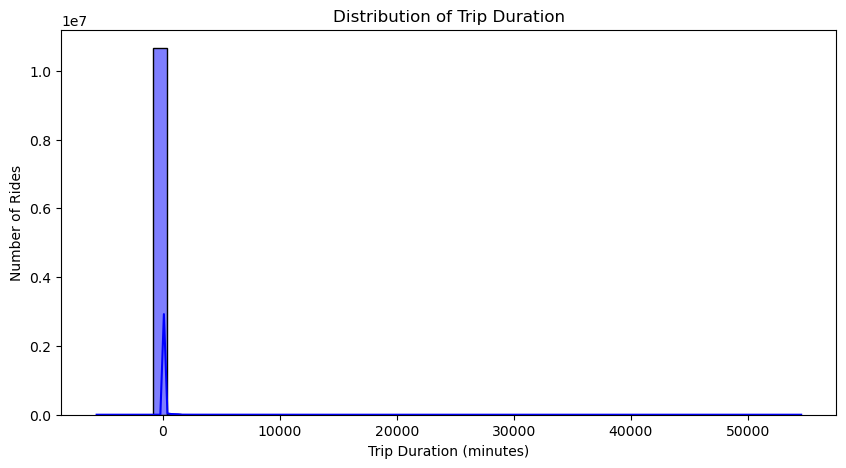

In [3]:
# Goal: Understand how long users ride bikes on average.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert timestamps to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Calculate trip duration in minutes
df["trip_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(df["trip_duration"], bins=50, kde=True, color="blue")

# Labels & Title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Rides")
plt.title("Distribution of Trip Duration")

plt.show()


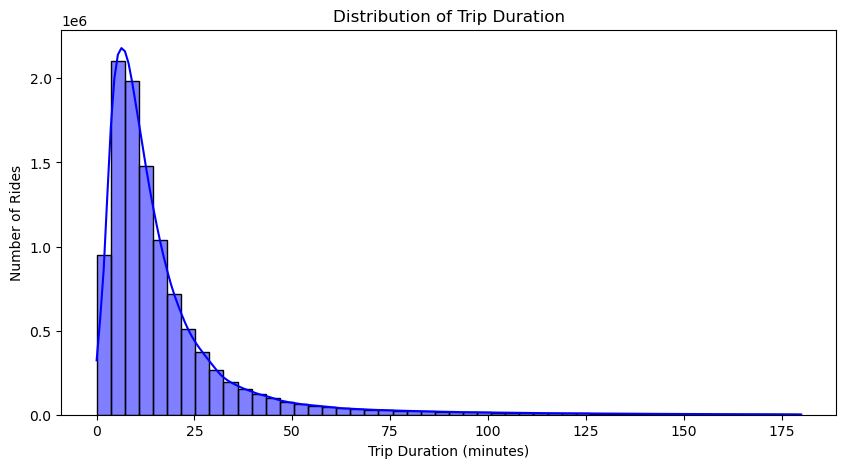

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert timestamps to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Calculate trip duration in minutes
df["trip_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

# Remove negative durations (if any)
df = df[df["trip_duration"] > 0]

# Remove extremely long trips (e.g., longer than 180 minutes / 3 hours)
df_filtered = df[df["trip_duration"] < 180]

# Plot cleaned distribution
plt.figure(figsize=(10,5))
sns.histplot(df_filtered["trip_duration"], bins=50, kde=True, color="blue")

# Labels & Title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Rides")
plt.title("Distribution of Trip Duration")

plt.show()


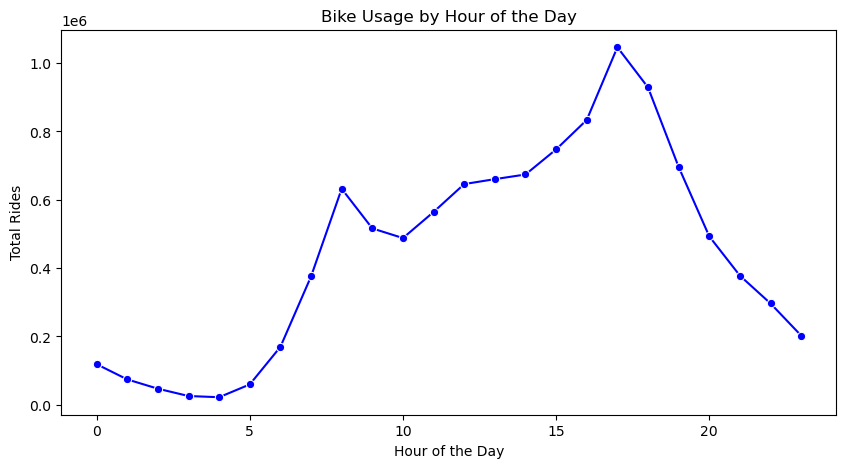

In [4]:
# Find out at which times most trips happen.
# Extract hour from the start time
df["hour"] = df["started_at"].dt.hour

# Aggregate rides per hour
hourly_rides = df.groupby("hour")["ride_id"].count().reset_index()

# Plot line chart
plt.figure(figsize=(10,5))
sns.lineplot(x="hour", y="ride_id", data=hourly_rides, marker="o", color="blue")

# Labels & Title
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rides")
plt.title("Bike Usage by Hour of the Day")

plt.show()


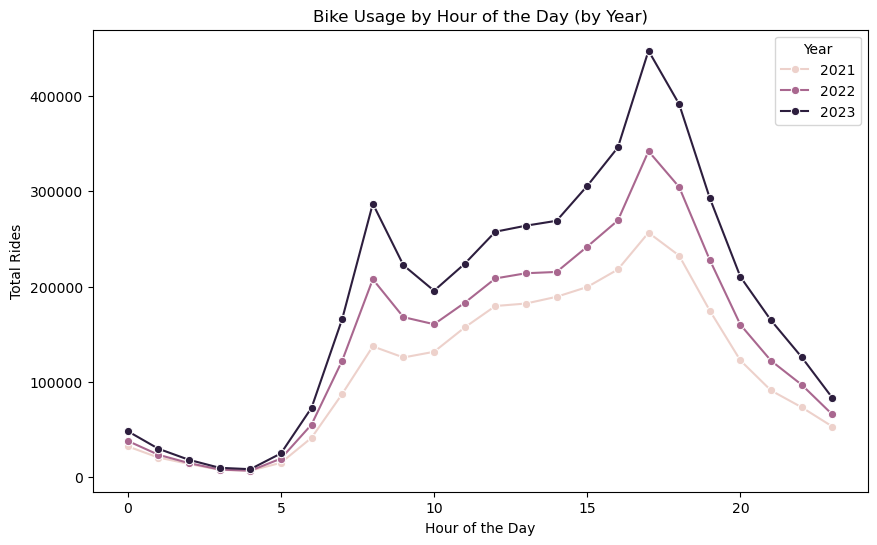

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date column is in datetime format
df["started_at"] = pd.to_datetime(df["started_at"])

# Extract year and hour from the start time
df["year"] = df["started_at"].dt.year
df["hour"] = df["started_at"].dt.hour

# Aggregate rides per hour and year
hourly_rides_yearly = df.groupby(["year", "hour"])["ride_id"].count().reset_index()

# Plot line chart with multiple years
plt.figure(figsize=(10,6))
sns.lineplot(x="hour", y="ride_id", hue="year", data=hourly_rides_yearly, marker="o")

# Labels & Title
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rides")
plt.title("Bike Usage by Hour of the Day (by Year)")

# Show legend
plt.legend(title="Year")

# Display plot
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_18276\776598017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_stations.values, y=popular_stations.index, palette="coolwarm")


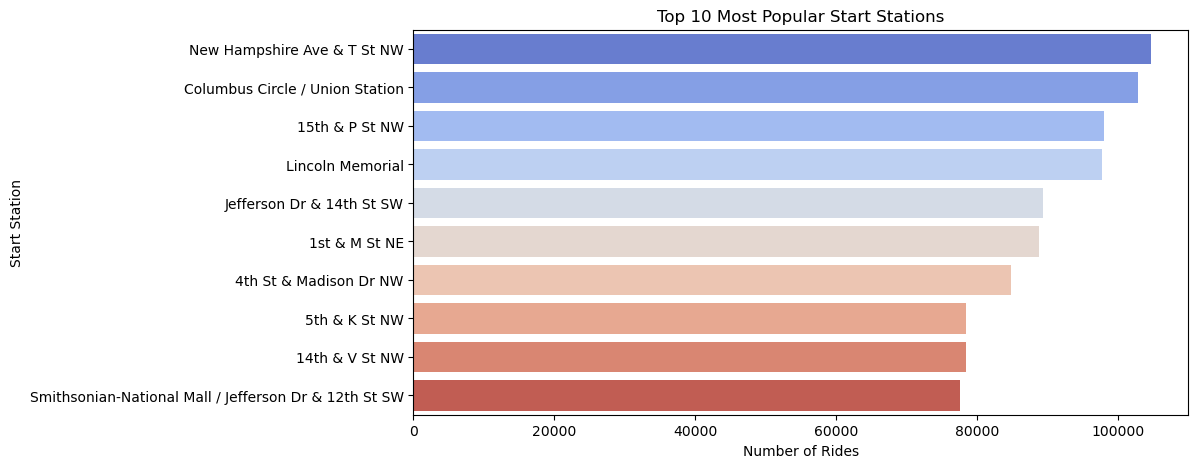

In [5]:
#Goal: Find the most frequently used bike stations.
# Count rides per start station
popular_stations = df["start_station_name"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=popular_stations.values, y=popular_stations.index, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.title("Top 10 Most Popular Start Stations")

plt.show()


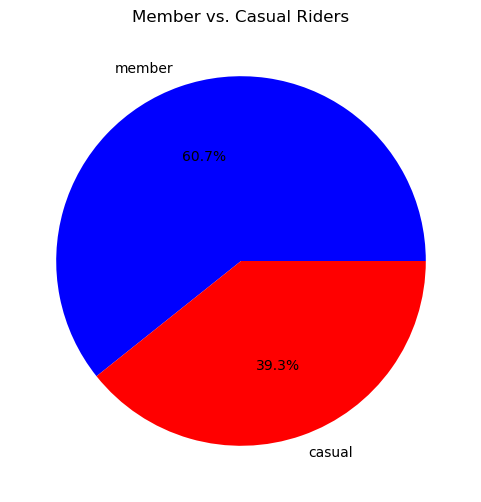

In [6]:
#Goal: Find the most frequently used bike stations.
# Aggregate total rides by user type
user_type_rides = df["member_casual"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(user_type_rides, labels=user_type_rides.index, autopct='%1.1f%%', colors=["blue", "red"])
plt.title("Member vs. Casual Riders")

plt.show()


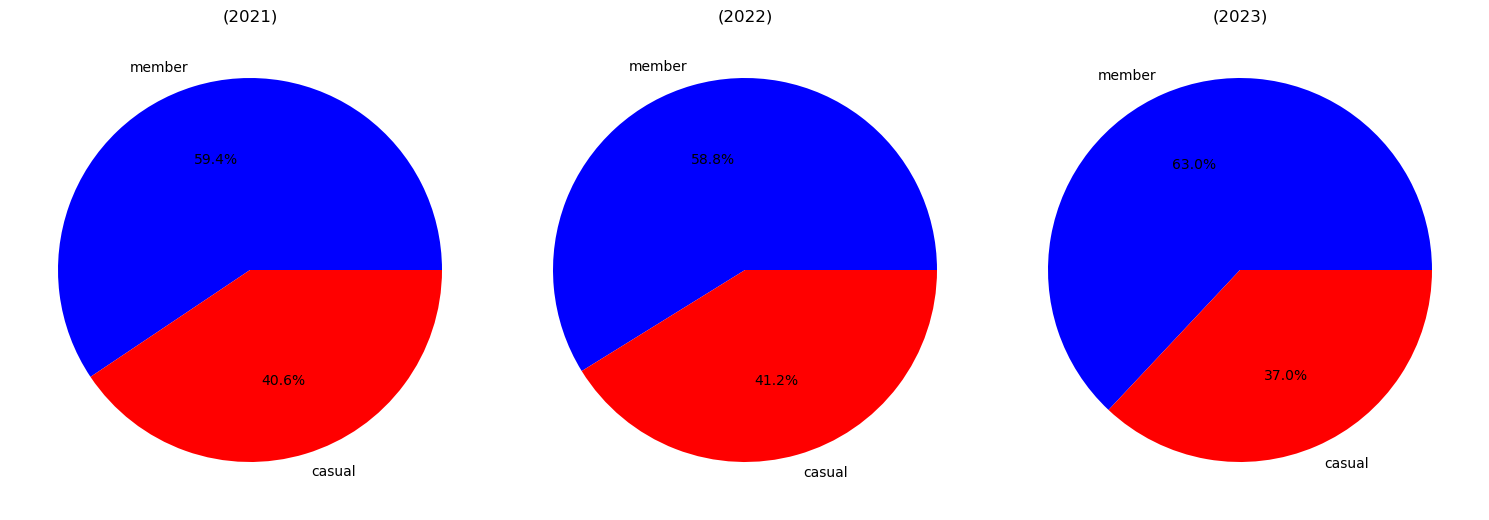

In [10]:
import matplotlib.pyplot as plt

# Ensure Date column is in datetime format
df["started_at"] = pd.to_datetime(df["started_at"])

# Extract year from the started_at column
df["year"] = df["started_at"].dt.year

# Get unique years
years = df["year"].unique()

# Create subplots for each year
fig, axes = plt.subplots(1, len(years), figsize=(15,6))

# Loop through each year and create a pie chart
for i, year in enumerate(sorted(years)):
    # Filter data for the specific year
    user_type_rides = df[df["year"] == year]["member_casual"].value_counts()
    
    # Pie chart
    axes[i].pie(user_type_rides, labels=user_type_rides.index, autopct='%1.1f%%', colors=["blue", "red"])
    #axes[i].set_title(f"Member vs. Casual Riders ({year})")
    axes[i].set_title(f"({year})")

# Show plot
plt.tight_layout()
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_18276\715176800.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_routes.values, y=popular_routes.index, palette="coolwarm")


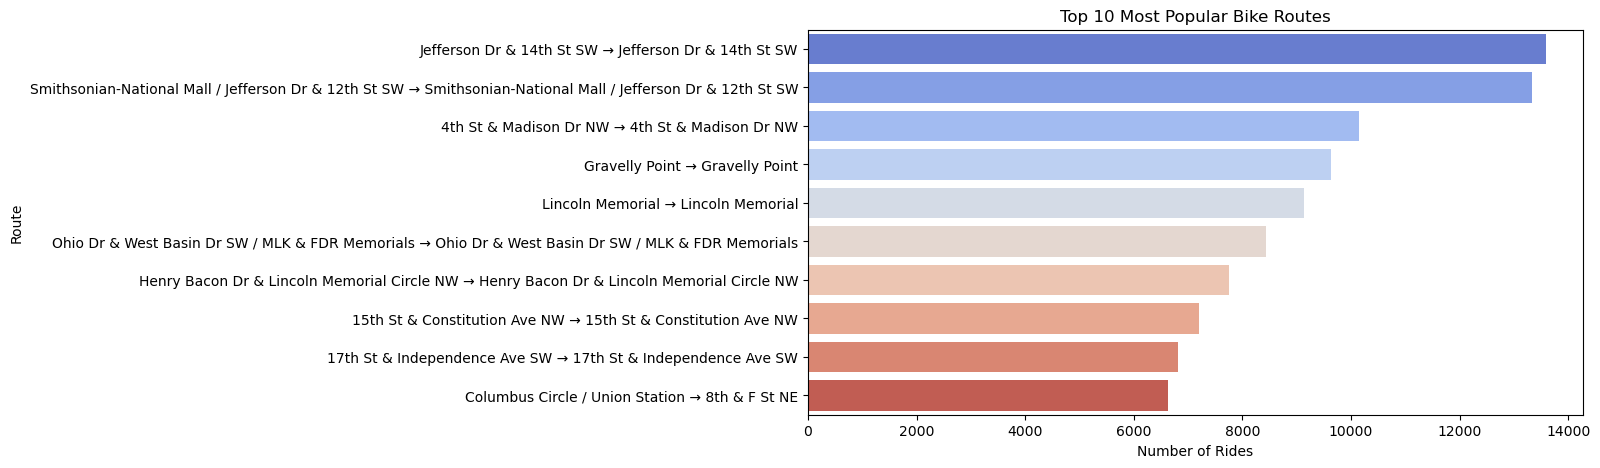

In [7]:
#Goal: Identify the most frequently used routes.
# Create a new column for route (Start → End)
df["route"] = df["start_station_name"] + " → " + df["end_station_name"]

# Count top 10 most frequent routes
popular_routes = df["route"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=popular_routes.values, y=popular_routes.index, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("Route")
plt.title("Top 10 Most Popular Bike Routes")

plt.show()
